<a href="https://colab.research.google.com/github/VamsiPutheti12/ML-DL/blob/main/ML/Simple_Multivariate_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch w1         w2         b          Loss      
1     2.20000    2.00000    1.40000    50.00000  
2     2.08000    1.70000    1.26000    1.30000   
3     2.18200    1.64000    1.27400    0.66100   
4     2.25280    1.56500    1.27260    0.53149   
5     2.31862    1.49960    1.27274    0.43047   

Final model:
ŷ = 2.31862 * x1 + 1.49960 * x2 + 1.27274


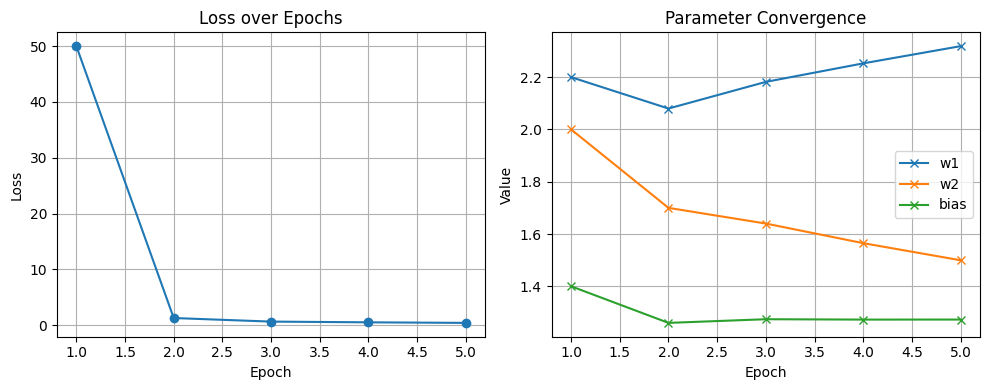

In [1]:
# Multiple Linear Regression using Gradient Descent (Simple Example) with PyTorch

import numpy as np
import matplotlib.pyplot as plt
import torch

# Dataset
X_np = np.array([[1, 2], [2, 1]], dtype=np.float32)
y_np = np.array([6, 8], dtype=np.float32)

X = torch.tensor(X_np)
y = torch.tensor(y_np)

# Initialize parameters
w = torch.zeros(2, requires_grad=True)
b = torch.zeros(1, requires_grad=True)
learning_rate = 0.1
epochs = 5

# To store history
loss_history = []
w1_history = []
w2_history = []
b_history = []

# Training loop
print(f"{'Epoch':<5} {'w1':<10} {'w2':<10} {'b':<10} {'Loss':<10}")
for epoch in range(1, epochs + 1):
    # Predictions
    y_pred = X @ w + b

    # Loss (MSE)
    loss = torch.mean((y_pred - y) ** 2)

    # Backpropagation
    loss.backward()

    # Gradient descent update
    with torch.no_grad():
        w -= learning_rate * w.grad
        b -= learning_rate * b.grad

    # Zero gradients after each step
    w.grad.zero_()
    b.grad.zero_()

    # Store history
    loss_history.append(loss.item())
    w1_history.append(w[0].item())
    w2_history.append(w[1].item())
    b_history.append(b.item())

    # Print epoch details
    print(f"{epoch:<5} {w[0].item():<10.5f} {w[1].item():<10.5f} {b.item():<10.5f} {loss.item():<10.5f}")

# Final model
print("\nFinal model:")
print(f"ŷ = {w[0].item():.5f} * x1 + {w[1].item():.5f} * x2 + {b.item():.5f}")

# Plotting Loss over Epochs
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(range(1, epochs + 1), loss_history, marker='o')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)

# Plotting Weight and Bias Convergence
plt.subplot(1, 2, 2)
plt.plot(range(1, epochs + 1), w1_history, label='w1', marker='x')
plt.plot(range(1, epochs + 1), w2_history, label='w2', marker='x')
plt.plot(range(1, epochs + 1), b_history, label='bias', marker='x')
plt.title('Parameter Convergence')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
